### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [53]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import StandardScalar
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [21]:
df.value_counts("Type")

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [4]:
df.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Type", axis=1), df["Type"], test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((171, 9), (43, 9), (171,), (43,))

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[ 3.11822871,  0.70984522,  0.71823531, ...,  0.72309469,
        -0.3708268 ,  0.43352211],
       [-1.11919497,  1.76674346, -1.88787514, ..., -0.36101533,
         0.77837626, -0.58198858],
       [-0.35844328, -0.66658038,  0.56327739, ..., -0.33069058,
        -0.3708268 , -0.58198858],
       ...,
       [-0.82885978, -0.39621107,  0.64075635, ..., -0.78556192,
        -0.3708268 , -0.58198858],
       [-0.47237228, -0.10126272,  0.60553864, ..., -0.57328863,
        -0.3708268 , -0.58198858],
       [-0.07913348, -0.82634407,  0.56327739, ..., -0.14116085,
        -0.3708268 , -0.58198858]])

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [60]:
my_knn = KNeighborsClassifier(n_neighbors=1)
my_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
y_pred = my_knn.predict(X_test_scaled)
y_pred

array([6, 7, 2, 2, 2, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 7,
       2, 1, 3, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 2, 2, 5, 1, 1, 7, 7])

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
acc

[[13  3  3  0  0  0]
 [ 1  9  0  1  1  0]
 [ 1  3  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


0.6976744186046512

In [33]:
accuracy_scores_test = []
accuracy_scores_train = []
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_pred_test_n = knn.predict(X_test)
    accuracy_scores_test.append(accuracy_score(y_test, y_pred_test_n))

    y_pred_train_n = knn.predict(X_train)
    accuracy_scores_train.append(accuracy_score(y_train, y_pred_train_n))

print("Test Accuracy Scores:", accuracy_scores_test)
print("Train Accuracy Scores:", accuracy_scores_train)

Test Accuracy Scores: [0.7209302325581395, 0.6976744186046512, 0.6976744186046512, 0.6976744186046512, 0.7209302325581395, 0.6744186046511628, 0.6976744186046512, 0.6511627906976745, 0.6046511627906976, 0.6046511627906976, 0.5813953488372093, 0.6046511627906976, 0.627906976744186, 0.627906976744186, 0.627906976744186, 0.627906976744186, 0.6511627906976745, 0.6511627906976745, 0.6511627906976745, 0.6744186046511628]
Train Accuracy Scores: [1.0, 0.8362573099415205, 0.8187134502923976, 0.783625730994152, 0.7485380116959064, 0.7426900584795322, 0.7017543859649122, 0.6900584795321637, 0.6432748538011696, 0.6432748538011696, 0.6374269005847953, 0.631578947368421, 0.6374269005847953, 0.631578947368421, 0.631578947368421, 0.6374269005847953, 0.631578947368421, 0.631578947368421, 0.6257309941520468, 0.6257309941520468]


In [56]:
k_range = range(1,31)
cv_score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 5-fold cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())



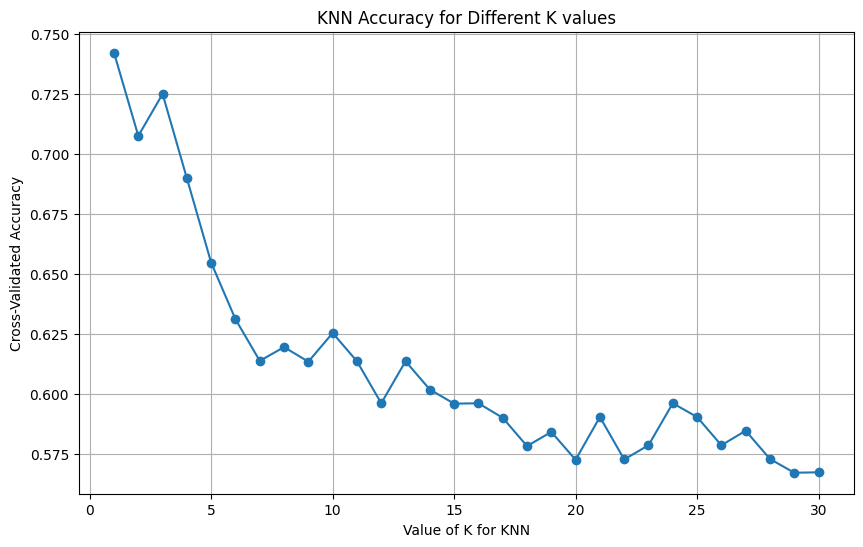

✅ Best K found using cross-validation: 1
✅ Best Cross-Validated Accuracy: 0.7420


In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_score, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different K values')
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_score)]
print(f"✅ Best K found using cross-validation: {best_k}")
print(f"✅ Best Cross-Validated Accuracy: {max(cv_score):.4f}")